# Assignment 9

## Eren Akgunduz

### Deep Learning &mdash; 31 March 2024

### [Link to notebook](https://colab.research.google.com/drive/1CW-4jjyigvdEFomswI7Qs901FlCKZpJ5)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

### Helper functions

In [3]:
def plot_curve(accuracy, loss, split: str):
    epochs=np.arange(loss.shape[0])
    plt.subplot(1,2,1)
    plt.plot(epochs, accuracy) # plt.axis([-1,2,-1,2])
    plt.xlabel('Epoch#')
    plt.ylabel('Accuracy')
    plt.title(f'{split} Accuracy')
    plt.subplot(1,2,2)
    plt.plot(epochs, loss)
    plt.xlabel('Epoch#')
    plt.ylabel('Binary crossentropy loss')
    plt.title(f'{split} loss')
    plt.show()

In [4]:
def plot_display_metrics(model, model_history, split: str):
    match split:
        case "Training":
            accuracy = np.array(model_history.history["accuracy"])
            loss = np.array(model_history.history["loss"])
        case "Validation":
            accuracy = np.array(model_history.history["val_accuracy"])
            loss = np.array(model_history.history["val_loss"])
        case _:
            raise ValueError("Not a valid set for displaying metrics, try 'Training' or 'Validation'")

    plot_curve(accuracy, loss, split)

    score = [accuracy[-1], loss[-1]]
    print(f"\n{split} accuracy: {round(score[0], 4) * 100}%")
    print(f"{split} loss: {round(score[1], 3)}")

In [5]:
def features_labels_split(data, label_column):
    features = data.copy()
    columns_titles = list(data. columns)
    features = features.reindex(columns=columns_titles)
    labels = features.pop(label_column)
    feature_names = list(features.columns)
    features = np.array(features)
    labels = np.array(labels)
    labels = labels.reshape((features.shape[0],1))
    return features, labels, feature_names

def features_labels_split_test(data, label_column, feature_names):
    features = data.copy()
    columns_titles = list(data.columns)
    features = features.reindex(columns=columns_titles)
    labels = features.pop(label_column)
    features_subset = np.zeros((labels.shape[0], 0))
    for column_i in feature_names:
        feature_i = np.expand_dims(features.pop(column_i), axis=1)
        features_subset = np.append(features_subset, feature_i, axis=1)
    labels = np.array(labels)
    labels = labels.reshape((features.shape[0],1))
    return features_subset, labels

### Loading in data

In [6]:
df = pd.read_csv("/content/drive/MyDrive/spotify_preprocessed.csv", sep=",")
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.738790,0.626533,0.090909,0.899432,0.0,0.070809,0.020080,0.00000,0.068476,0.723361,0.400098,0.093080,0.8,0.193225,0.093023,1.0
1,0.418807,0.247058,0.454545,0.687954,0.0,0.012962,0.874498,0.81809,0.080700,0.256148,0.676658,0.086266,0.6,0.155665,0.081395,0.0
2,0.530910,0.415269,0.818182,0.862211,0.0,0.031601,0.161647,0.00000,0.094582,0.280738,0.773251,0.103036,0.8,0.210605,0.081395,1.0
3,0.478668,0.648560,0.000000,0.880682,0.0,0.032351,0.005151,0.00000,0.194033,0.298156,0.305743,0.095749,0.8,0.138515,0.058140,0.0
4,0.810623,0.887860,0.090909,0.919516,1.0,0.270487,0.003825,0.00000,0.387755,0.799180,0.705958,0.067117,0.8,0.117248,0.069767,1.0


In [7]:
data, labels, feature_names = features_labels_split(df, "target")

In [8]:
data

array([[0.73878973, 0.62653279, 0.09090909, ..., 0.8       , 0.1932247 ,
        0.09302326],
       [0.41880714, 0.24705807, 0.45454545, ..., 0.6       , 0.15566527,
        0.08139535],
       [0.53090988, 0.4152685 , 0.81818182, ..., 0.8       , 0.21060483,
        0.08139535],
       ...,
       [0.71484545, 0.80475575, 0.90909091, ..., 0.8       , 0.09727058,
        0.05813953],
       [0.58532869, 0.17697039, 0.63636364, ..., 0.8       , 0.10158341,
        0.13953488],
       [0.06399652, 0.12290275, 0.36363636, ..., 0.8       , 0.33334162,
        0.15116279]])

In [9]:
labels

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]])

In [10]:
feature_names

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'chorus_hit',
 'sections']

### Splitting data

In [11]:
X, X_test, y, y_test = train_test_split(data, labels, test_size=0.1, shuffle=True)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

In [13]:
X_train.shape

(4606, 15)

In [14]:
X_val.shape

(1152, 15)

In [15]:
X_test.shape

(640, 15)

In [16]:
y_train.shape

(4606, 1)

In [17]:
y_val.shape

(1152, 1)

In [18]:
y_test.shape

(640, 1)

In [19]:
data.shape

(6398, 15)

In [20]:
y_train.shape[0] + y_val.shape[0] + y_test.shape[0] == data.shape[0]

True

### Build the model

In [21]:
model = Sequential()
model.add(Dense(input_dim=data.shape[1], units=32, activation="tanh"))
model.add(Dense(units=32, activation="tanh"))
model.add(Dense(units=1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Train the model

In [23]:
history = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
288/288 [==============================] - 1s 3ms/step - loss: 0.6649 - accuracy: 0.6405 - val_loss: 0.6243 - val_accuracy: 0.7283
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.6035 - accuracy: 0.7284 - val_loss: 0.5682 - val_accuracy: 0.7500
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.5557 - accuracy: 0.7449 - val_loss: 0.5281 - val_accuracy: 0.7578
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.5242 - accuracy: 0.7607 - val_loss: 0.5040 - val_accuracy: 0.7587
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.5045 - accuracy: 0.7701 - val_loss: 0.4900 - val_accuracy: 0.7717
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4913 - accuracy: 0.7712 - val_loss: 0.4780 - val_accuracy: 0.7656
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4839 - accuracy: 0.7712 - val_loss: 0.4746 - val_accuracy: 0.7682
Epoch 

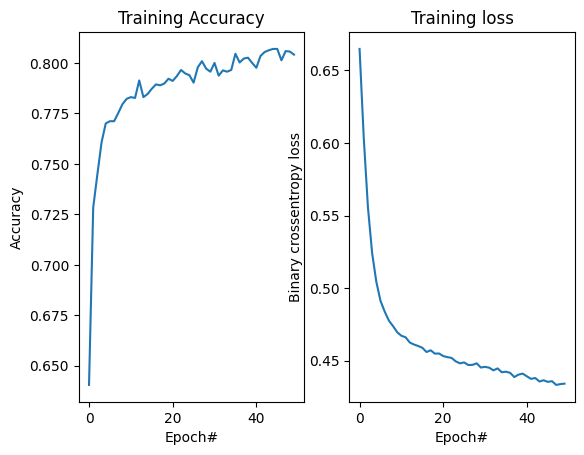


Training accuracy: 80.42%
Training loss: 0.434


In [24]:
plot_display_metrics(model, history, "Training")

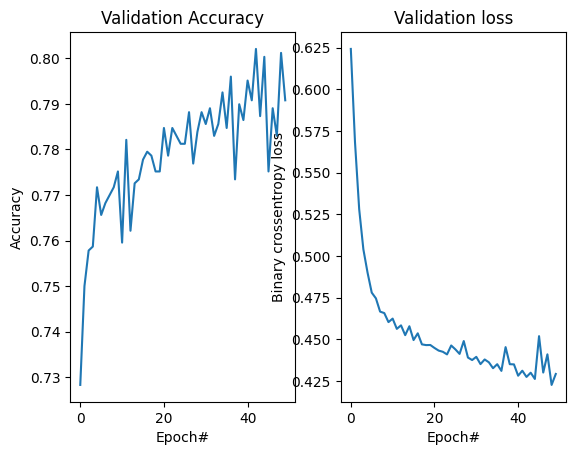


Validation accuracy: 79.08%
Validation loss: 0.429


In [25]:
plot_display_metrics(model, history, "Validation")

In [26]:
train_score = model.evaluate(X_train, y_train)
print(f"\nTraining accuracy: {round(train_score[1], 4) * 100}%")
print(f"Training loss: {round(train_score[0], 3)}")

144/144 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8009

Training accuracy: 80.08999999999999%
Training loss: 0.431


In [27]:
val_score = model.evaluate(X_val, y_val)
print(f"\nValidation accuracy: {round(val_score[1], 4) * 100}%")
print(f"Validation loss: {round(val_score[0], 3)}")

36/36 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.7908

Validation accuracy: 79.08%
Validation loss: 0.429


### Trying out modifications to model

#### Take 1: Substitute SGD with Adam

In [29]:
model_1 = Sequential()
model_1.add(Dense(input_dim=data.shape[1], units=32, activation="tanh"))
model_1.add(Dense(units=32, activation="tanh"))
model_1.add(Dense(units=1, activation="sigmoid"))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                512       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_1.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [31]:
history = model_1.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
288/288 [==============================] - 2s 3ms/step - loss: 0.6729 - accuracy: 0.6333 - val_loss: 0.6482 - val_accuracy: 0.6927
Epoch 2/50
288/288 [==============================] - 1s 3ms/step - loss: 0.6304 - accuracy: 0.7028 - val_loss: 0.6042 - val_accuracy: 0.7049
Epoch 3/50
288/288 [==============================] - 1s 3ms/step - loss: 0.5898 - accuracy: 0.7247 - val_loss: 0.5644 - val_accuracy: 0.7405
Epoch 4/50
288/288 [==============================] - 1s 3ms/step - loss: 0.5555 - accuracy: 0.7393 - val_loss: 0.5352 - val_accuracy: 0.7326
Epoch 5/50
288/288 [==============================] - 1s 3ms/step - loss: 0.5306 - accuracy: 0.7534 - val_loss: 0.5136 - val_accuracy: 0.7465
Epoch 6/50
288/288 [==============================] - 1s 4ms/step - loss: 0.5131 - accuracy: 0.7603 - val_loss: 0.4999 - val_accuracy: 0.7535
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.5006 - accuracy: 0.7660 - val_loss: 0.4902 - val_accuracy: 0.7613
Epoch 

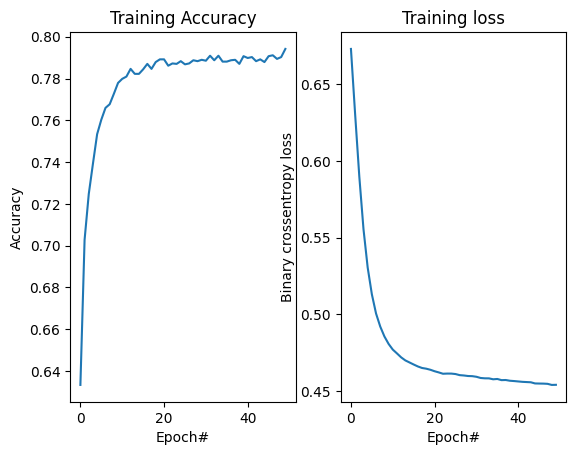


Training accuracy: 79.42%
Training loss: 0.454


In [32]:
plot_display_metrics(model_1, history, "Training")

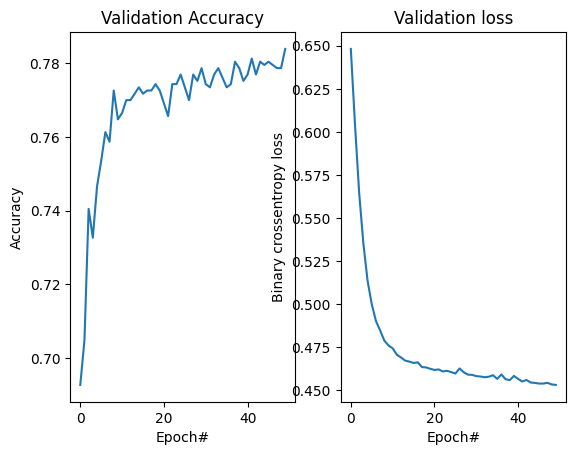


Validation accuracy: 78.39%
Validation loss: 0.453


In [33]:
plot_display_metrics(model_1, history, "Validation")

#### Take 2: Double the units of first layer

In [34]:
model_2 = Sequential()
model_2.add(Dense(input_dim=data.shape[1], units=64, activation="tanh"))
model_2.add(Dense(units=32, activation="tanh"))
model_2.add(Dense(units=1, activation="sigmoid"))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1024      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model_2.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [36]:
history = model_2.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
288/288 [==============================] - 1s 3ms/step - loss: 0.6702 - accuracy: 0.6116 - val_loss: 0.6287 - val_accuracy: 0.6892
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.6006 - accuracy: 0.7110 - val_loss: 0.5699 - val_accuracy: 0.7005
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7304 - val_loss: 0.5270 - val_accuracy: 0.7352
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.5227 - accuracy: 0.7508 - val_loss: 0.5040 - val_accuracy: 0.7448
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.5033 - accuracy: 0.7588 - val_loss: 0.4884 - val_accuracy: 0.7656
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4900 - accuracy: 0.7723 - val_loss: 0.4813 - val_accuracy: 0.7622
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4826 - accuracy: 0.7733 - val_loss: 0.4843 - val_accuracy: 0.7561
Epoch 

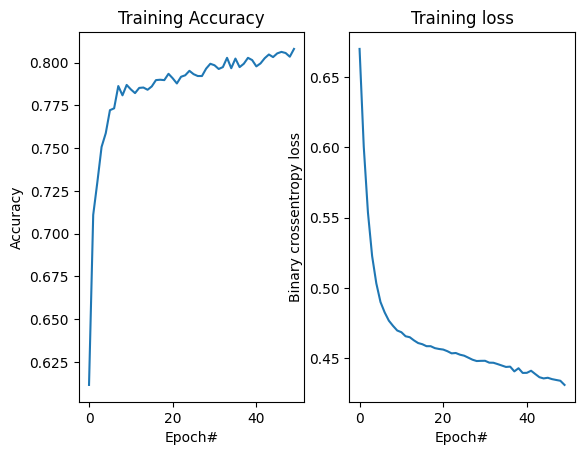


Training accuracy: 80.81%
Training loss: 0.431


In [37]:
plot_display_metrics(model_2, history, "Training")

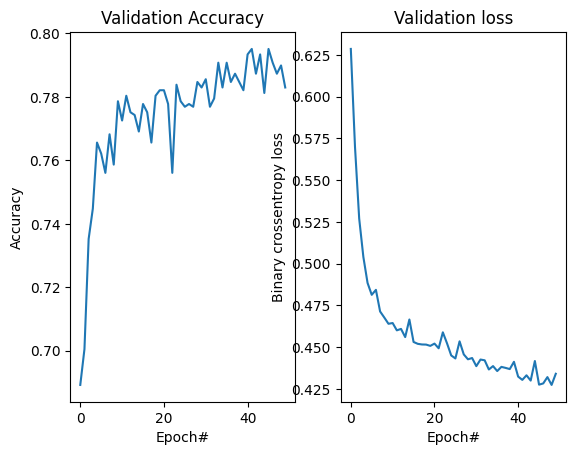


Validation accuracy: 78.3%
Validation loss: 0.434


In [38]:
plot_display_metrics(model_2, history, "Validation")

#### Take 3: Combine the two approaches above

In [39]:
model_3 = Sequential()
model_3.add(Dense(input_dim=data.shape[1], units=64, activation="tanh"))
model_3.add(Dense(units=32, activation="tanh"))
model_3.add(Dense(units=1, activation="sigmoid"))
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                1024      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_3.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [42]:
history = model_3.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
288/288 [==============================] - 1s 3ms/step - loss: 0.4564 - accuracy: 0.7901 - val_loss: 0.4540 - val_accuracy: 0.7769
Epoch 2/50
288/288 [==============================] - 1s 3ms/step - loss: 0.4564 - accuracy: 0.7894 - val_loss: 0.4552 - val_accuracy: 0.7778
Epoch 3/50
288/288 [==============================] - 1s 3ms/step - loss: 0.4563 - accuracy: 0.7937 - val_loss: 0.4527 - val_accuracy: 0.7769
Epoch 4/50
288/288 [==============================] - 1s 3ms/step - loss: 0.4555 - accuracy: 0.7905 - val_loss: 0.4522 - val_accuracy: 0.7804
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.7898 - val_loss: 0.4526 - val_accuracy: 0.7778
Epoch 6/50
288/288 [==============================] - 1s 3ms/step - loss: 0.4552 - accuracy: 0.7879 - val_loss: 0.4524 - val_accuracy: 0.7795
Epoch 7/50
288/288 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.7935 - val_loss: 0.4532 - val_accuracy: 0.7795
Epoch 

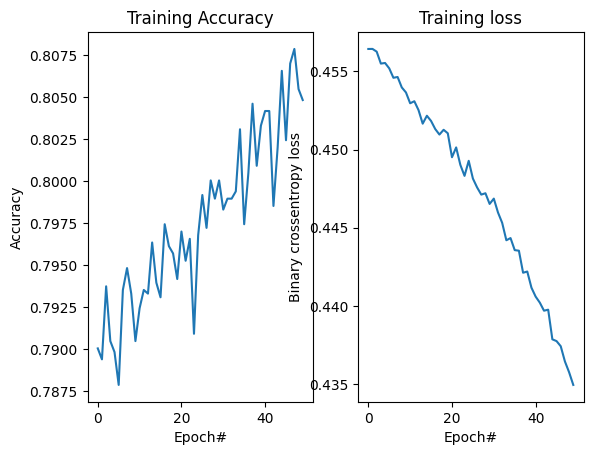


Training accuracy: 80.47999999999999%
Training loss: 0.435


In [43]:
plot_display_metrics(model_3, history, "Training")

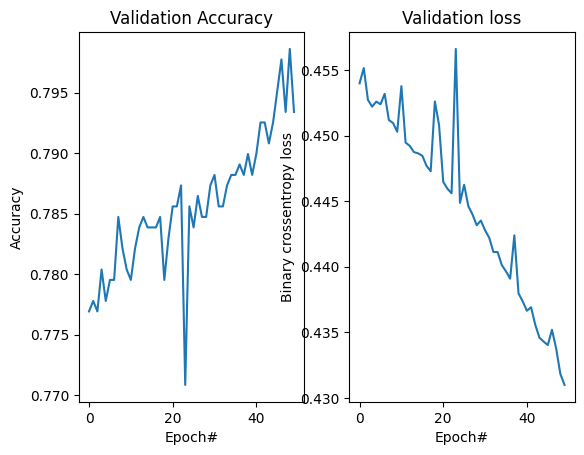


Validation accuracy: 79.34%
Validation loss: 0.431


In [44]:
plot_display_metrics(model_3, history, "Validation")

### Evaluating selected model on test set

I have selected Model 2 (units of first layer doubled), as both this model and Model 1 exhibited nearly the same validation accuracy, but Model 2 saw a slightly higher training accuracy &mdash; meanwhile, Model 3 seemed to have a far more volatile training and validation trajectory based on the plots.

In [45]:
test_score = model_2.evaluate(X_test, y_test)
print(f"\nTesting accuracy: {round(test_score[1], 4) * 100}%")
print(f"Testing loss: {round(test_score[0], 3)}")

20/20 [==============================] - 1s 6ms/step - loss: 0.4414 - accuracy: 0.7844

Testing accuracy: 78.44%
Testing loss: 0.441
